### Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]

# Function to calculate PDF from a single file
def calculate_pdf_wetvalues (precipitation_data,bins_i_want, filter_small_vals=False ):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

In [3]:
resolution = '12km'

### Get observations data for overlapping and not overlapping time periods

In [10]:
# # Initialize variables to accumulate PDF
# total_pdf_nimrod_wv_o = np.zeros(bin_num)  # Assuming 50 bins for the histogram
# total_bin_centers_nimrod_wv_o = None
 
# # Process each file and accumulate PDF
# datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/NIMROD/30mins/NIMROD_regridded_2.2km/'
# for yr in range(2006,2008):
#     print(yr)
#     file_name = datadir + f"{yr}_compressed.npy"
#     pdf_nimrod_wv, bin_centers_nimrod_wv = calculate_pdf_wetvalues(file_name)
#     total_pdf_nimrod_wv_o += pdf_nimrod_wv
#     total_bin_centers_nimrod_wv_o = bin_centers_nimrod_wv

In [5]:
obs_data_overlap = np.array([])
obs_data_no_overlap = np.array([])

datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/NIMROD/30mins/NIMROD_regridded_12km/'

for yr in range(2008,2010):
    print(yr)
    file_name = datadir + f"compressed_{yr}_filtered_100.npy"
    this_yr = np.load(file_name)
    obs_data_no_overlap =np.append(obs_data_no_overlap, this_yr)
    if yr >=2006 and yr <=2020:
         obs_data_overlap =np.append(obs_data_overlap, this_yr)

### Get model data for overlapping and not overlapping time periods

In [7]:
ems=  [ 'bc006','bc005',   'bc007', 'bc009',  'bc010', 
       'bc011', 'bc013',  'bc015',  'bc016',  'bc017', 'bc018', 'bc012']
model_data_overlap = np.array([])
model_data_no_overlap = np.array([])
for em in ems:
    datadir = f"/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_every30mins/2.2km_bng_regridded_12km_masked/2002_2020/{em}_wholeyear/"
    for yr in range(2001, 2020):
        print(em, yr)
        file_name = datadir + f"{yr}_compressed.npy"
        this_yr = np.load(file_name)
        model_data_no_overlap =np.append(model_data_no_overlap, this_yr)
        if yr >=2006 and yr <=2020:
            model_data_overlap =np.append(model_data_overlap, this_yr)

bc006 2001
bc006 2002
bc006 2003
bc006 2004
bc006 2005
bc006 2006
bc006 2007
bc006 2008
bc006 2009
bc006 2010
bc006 2011
bc006 2012
bc006 2013
bc006 2014
bc006 2015
bc006 2016
bc006 2017
bc006 2018
bc006 2019
bc005 2001
bc005 2002
bc005 2003
bc005 2004
bc005 2005
bc005 2006
bc005 2007
bc005 2008
bc005 2009
bc005 2010
bc005 2011
bc005 2012
bc005 2013
bc005 2014
bc005 2015
bc005 2016
bc005 2017
bc005 2018
bc005 2019
bc007 2001
bc007 2002
bc007 2003
bc007 2004
bc007 2005
bc007 2006
bc007 2007
bc007 2008
bc007 2009
bc007 2010
bc007 2011
bc007 2012
bc007 2013
bc007 2014
bc007 2015
bc007 2016
bc007 2017
bc007 2018
bc007 2019
bc009 2001
bc009 2002
bc009 2003
bc009 2004
bc009 2005
bc009 2006
bc009 2007
bc009 2008
bc009 2009
bc009 2010
bc009 2011
bc009 2012
bc009 2013
bc009 2014
bc009 2015
bc009 2016
bc009 2017
bc009 2018
bc009 2019
bc010 2001
bc010 2002
bc010 2003
bc010 2004
bc010 2005
bc010 2006
bc010 2007
bc010 2008
bc010 2009
bc010 2010
bc010 2011
bc010 2012
bc010 2013
bc010 2014
bc010 2015

In [23]:
np.save('/nfs/a319/gy17m2a/PhD/datadir/model_data_overlap.npy', model_data_overlap)
np.save('/nfs/a319/gy17m2a/PhD/datadir/model_data_no_overlap.npy', model_data_no_overlap)

In [29]:
# obs_data_no_overlap_onlywetvalues=obs_data_no_overlap[obs_data_no_overlap>=0.1]
# obs_data_overlap_onlywetvalues=obs_data_overlap[obs_data_overlap >=0.1]

In [8]:
# model_data_no_overlap_onlywetvalues=model_data_no_overlap[model_data_no_overlap>=0.1]
# model_data_overlap_onlywetvalues=model_data_overlap[model_data_overlap >=0.1]

In [43]:
# np.save('/nfs/a319/gy17m2a/PhD/datadir/obs_data_overlap.npy', obs_data_overlap)
# np.save('/nfs/a319/gy17m2a/PhD/datadir/obs_data_no_overlap.npy', obs_data_no_overlap)

In [44]:
# np.save('/nfs/a319/gy17m2a/PhD/datadir/model_data_overlap.npy', model_data_overlap)
# np.save('/nfs/a319/gy17m2a/PhD/datadir/model_data_no_overlap.npy', model_data_no_overlap)

In [20]:
# model_data_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/model_data_overlap.npy')
# model_data_no_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/model_data_no_overlap.npy')
# obs_data_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/obs_data_overlap.npy')
# obs_data_no_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/obs_data_no_overlap.npy')

## Calculate CDFs and CCDFs

In [9]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50,  max(np.nanmax(obs_data_overlap), np.nanmax(model_data_overlap))]
# bins_i_want = np.logspace(np.log10(0.09), np.log10(100), 21)
low_bins_i_want = [0.1,  0.95, 1.05, 1.15,2]
# low_bin_num = len(bins_i_want)-1

In [8]:
# # An alternative is to use a logarithmmic spacing (see lower down)
# number_many_linear_bins=20 # Number of bins for improved plots with equal bins
# power_for_unequal_bins=3.0 # Power used for generating unequal bins
# number_unequal_bins=12 # Number of unequal bins 
# unequal_min=0.1 # Must be zero or bigger for this approach to work
# unequal_max=1.01*np.nanmax(obs_data_no_overlap) # Ensure this is greater than the largest number
# # N-th root (e.g. third root) of bin edges for manual bin edge spacing
# unequal_linspace=np.linspace(unequal_min,unequal_max**(1.0/power_for_unequal_bins),number_unequal_bins) 
# bins_i_want=unequal_linspace**power_for_unequal_bins
# bins_i_want

### Overlapping years - CDF

In [91]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    print(np.nanmin(precipitation_data))
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    print(np.nanmin(precipitation_data))
    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]


obs_overlap_cdf, obs_overlap_ccdf, obs_overlap_bin_centres, obs_overlap_bin_edges = calculate_ccdf_wetvalues(obs_data_overlap_onlywetvalues, bins_i_want)
model_overlap_cdf, model_overlap_ccdf, model_overlap_bin_centres, model_overlap_bin_edges = calculate_ccdf_wetvalues(model_data_overlap_onlywetvalues,bins_i_want)

0.1
0.1
0.10000000149011612
0.10000000149011612


In [10]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    import numpy as np
    
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    
    # Debug: Check data before filtering
    print("Raw precipitation data:", precipitation_data)
    
    # Keep only wet values
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    print("Filtered data (>= 0.1):", precipitation_data)

    # Compute the histogram and cumulative distribution
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Debug: Check histogram and bin edges
    print("Histogram:", hist)
    print("Bin edges:", bin_edges)
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf

    # Debug: Check CDF and CCDF
    print("CDF:", cdf)
    print("CCDF:", ccdf)
    
    # Find the center point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]


In [19]:
obs_overlap_cdf, obs_overlap_ccdf, obs_overlap_bin_centres, obs_overlap_bin_edges = calculate_ccdf_wetvalues(obs_data_overlap, bins_i_want)
model_overlap_cdf, model_overlap_ccdf, model_overlap_bin_centres, model_overlap_bin_edges = calculate_ccdf_wetvalues(model_data_overlap,bins_i_want)

### Overlapping years - CDF - low values

In [17]:
obs_overlap_cdf_low, obs_overlap_ccdf_low, obs_overlap_bin_centres_low,  obs_overlap_bin_edges_low  = calculate_ccdf_wetvalues(obs_data_overlap, low_bins_i_want)
model_overlap_cdf_low, model_overlap_ccdf_low, model_overlap_bin_centres_low, model_overlap_bin_edges_low = calculate_ccdf_wetvalues(model_data_overlap,low_bins_i_want)

### Overlapping years - PDF

In [15]:
obs_overlap_pdf, obs_overlap_bin_centres_pdf = calculate_pdf_wetvalues(obs_data_overlap, bins_i_want)
model_overlap_pdf, model_overlap_bin_centres_pdf = calculate_pdf_wetvalues(model_data_overlap,bins_i_want)

### Not overlapping years - CDF

In [18]:
obs_no_overlap_cdf, obs_no_overlap_ccdf, obs_no_overlap_bin_centres, obs_no_overlap_bin_edges = calculate_ccdf_wetvalues(obs_data_overlap, bins_i_want)
model_no_overlap_cdf, model_no_overlap_ccdf, model_no_overlap_bin_centres, model_no_overlap_bin_edges = calculate_ccdf_wetvalues(model_data_overlap, bins_i_want)

### Plot

In [20]:
# Create patches
patches= []
patch1 = mpatches.Patch(color= 'black', label='NIMROD')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18')
patches.append(patch1)
patches.append(patch2)

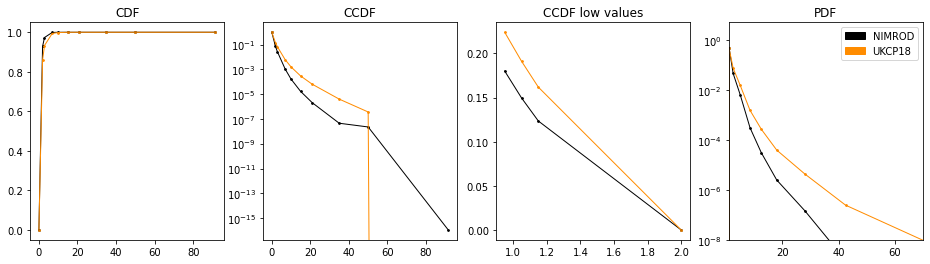

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_edges, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_edges,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_edges, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_edges,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')
# axs[0].set_ylim(0, None) 

axs[1].scatter(obs_no_overlap_bin_edges, obs_no_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_no_overlap_bin_edges,obs_no_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_edges, model_overlap_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(model_overlap_bin_edges,model_overlap_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].set_yscale('log')
# axs[1].set_xlim(0,80)
# axs[1].set_ylim(0,1)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_edges_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_edges_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_edges_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'darkorange')
axs[2].plot(model_overlap_bin_edges_low,model_overlap_ccdf_low ,linewidth = 1, color = 'darkorange')
# axs[2].set_xlim(1,1.10)
# axs[2].set_ylim(0.1,0.35)
axs[2].set_title('CCDF low values')

axs[3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
axs[3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
axs[3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'darkorange')
axs[3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'darkorange')
axs[3].set_title('PDF')
axs[3].set_yscale('log')
axs[3].set_xlim(0.95,70)
axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

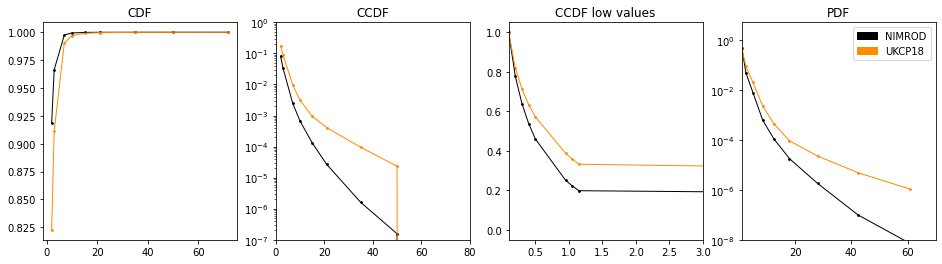

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_edges, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_edges,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_edges, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_edges,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[1].scatter(obs_no_overlap_bin_edges, obs_no_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_no_overlap_bin_edges,obs_no_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_edges, model_overlap_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(model_overlap_bin_edges,model_overlap_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].set_yscale('log')
axs[1].set_xlim(0,80)
axs[1].set_ylim(1e-7,1)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_edges_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_edges_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_edges_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'darkorange')
axs[2].plot(model_overlap_bin_edges_low,model_overlap_ccdf_low ,linewidth = 1, color = 'darkorange')
axs[2].set_xlim(0.1,3)
# axs[2].set_ylim(0.1,0.35)
axs[2].set_title('CCDF low values')

axs[3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
axs[3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
axs[3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'darkorange')
axs[3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'darkorange')
axs[3].set_title('PDF')
axs[3].set_yscale('log')
axs[3].set_xlim(0.95,70)
axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

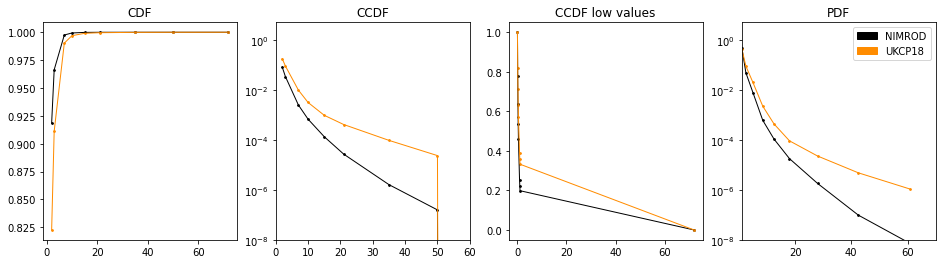

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_edges, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_edges,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_edges, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_edges,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[1].scatter(obs_no_overlap_bin_edges, obs_no_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_no_overlap_bin_edges,obs_no_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_edges, model_overlap_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(model_overlap_bin_edges,model_overlap_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].set_yscale('log')
axs[1].set_xlim(0,60)
axs[1].set_ylim(1e-8,5)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_edges_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_edges_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_edges_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'darkorange')
axs[2].plot(model_overlap_bin_edges_low,model_overlap_ccdf_low ,linewidth = 1, color = 'darkorange')
# axs[2].set_xlim(0.95,1.15)
# axs[2].set_ylim(0.225,0.35)
axs[2].set_title('CCDF low values')

axs[3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
axs[3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
axs[3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'darkorange')
axs[3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'darkorange')
axs[3].set_title('PDF')
axs[3].set_yscale('log')
axs[3].set_xlim(0.95,70)
axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

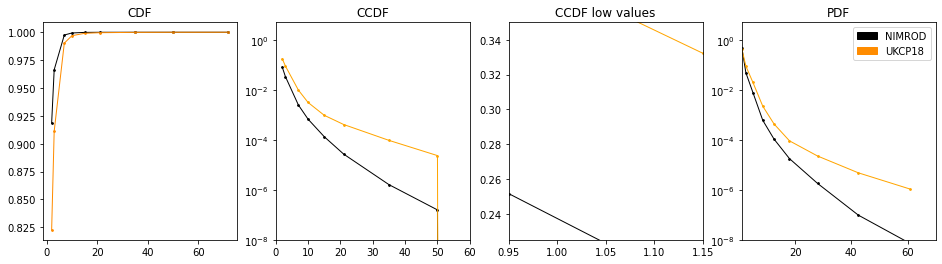

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_edges, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_edges,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_edges, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_edges,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[1].scatter(obs_overlap_bin_edges, obs_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_overlap_bin_edges,obs_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_edges, model_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(model_overlap_bin_edges,model_overlap_ccdf ,linewidth = 1, color = 'orange')
axs[1].set_yscale('log')
axs[1].set_xlim(0,60)
axs[1].set_ylim(1e-8,5)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_edges_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_edges_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_edges_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
axs[2].plot(model_overlap_bin_edges_low,model_overlap_ccdf_low ,linewidth = 1, color = 'orange')
axs[2].set_xlim(0.95,1.15)
axs[2].set_ylim(0.225,0.35)
axs[2].set_title('CCDF low values')

axs[3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
axs[3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
axs[3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'orange')
axs[3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'orange')
axs[3].set_title('PDF')
axs[3].set_yscale('log')
axs[3].set_xlim(0.95,70)
axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

### Old regridding method

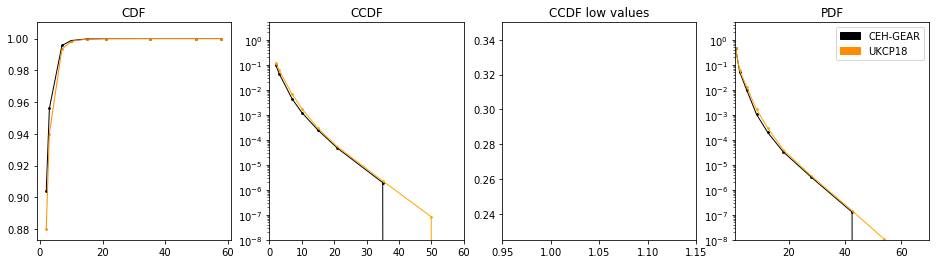

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_edges, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_edges,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_edges, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_edges,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[1].scatter(obs_overlap_bin_edges, obs_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_overlap_bin_edges,obs_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_edges, model_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(model_overlap_bin_edges,model_overlap_ccdf ,linewidth = 1, color = 'orange')
axs[1].set_yscale('log')
axs[1].set_xlim(0,60)
axs[1].set_ylim(1e-8,5)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_edges_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_edges_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_edges_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
axs[2].plot(model_overlap_bin_edges_low,model_overlap_ccdf_low ,linewidth = 1, color = 'orange')
axs[2].set_xlim(0.95,1.15)
axs[2].set_ylim(0.225,0.35)
axs[2].set_title('CCDF low values')

axs[3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
axs[3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
axs[3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'orange')
axs[3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'orange')
axs[3].set_title('PDF')
axs[3].set_yscale('log')
axs[3].set_xlim(0.95,70)
axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

### Not overlapping data

Text(0.5,1,'CCDF low values')

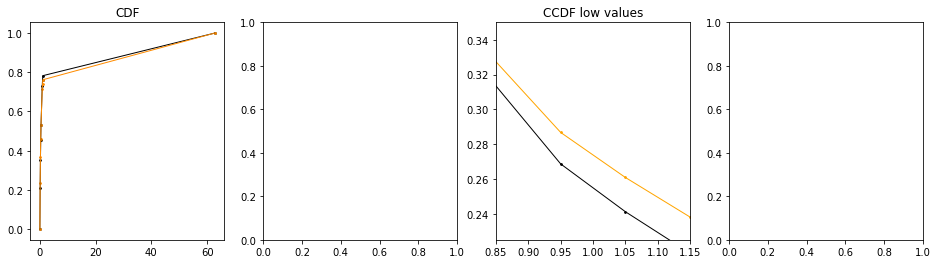

In [18]:
low_bins_i_want = [0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.95, 1.05, 1.15, np.nanmax(obs_data_overlap)]

obs_no_overlap_cdf_low, obs_no_overlap_ccdf_low, obs_no_overlap_bin_centres_low,  obs_no_overlap_bin_edges_low  = calculate_ccdf_wetvalues(obs_data_no_overlap, low_bins_i_want)
model_no_overlap_cdf_low, model_no_overlap_ccdf_low, model_no_overlap_bin_centres_low, model_no_overlap_bin_edges_low = calculate_ccdf_wetvalues(model_data_no_overlap,low_bins_i_want)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_no_overlap_bin_edges_low, obs_no_overlap_cdf_low ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_no_overlap_bin_edges_low,obs_no_overlap_cdf_low ,linewidth = 1, color = 'black')
axs[0].scatter(model_no_overlap_bin_edges_low, model_no_overlap_cdf_low ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_no_overlap_bin_edges_low,model_no_overlap_cdf_low ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[2].scatter(obs_no_overlap_bin_edges_low, obs_no_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_no_overlap_bin_edges_low,obs_no_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_no_overlap_bin_edges_low, model_no_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
axs[2].plot(model_no_overlap_bin_edges_low,model_no_overlap_ccdf_low ,linewidth = 1, color = 'orange')
axs[2].set_xlim(0.85,1.15)
axs[2].set_ylim(0.225,0.35)
axs[2].set_title('CCDF low values')

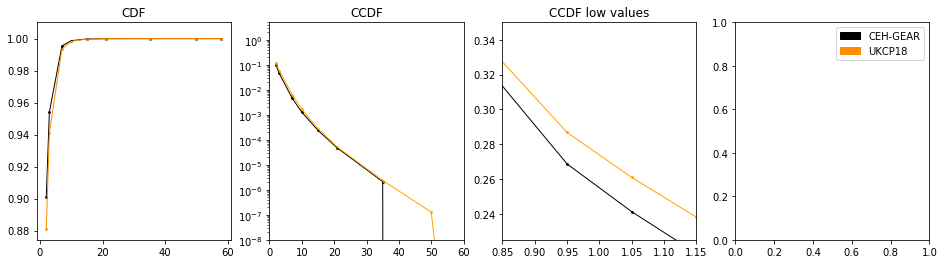

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_no_overlap_bin_edges, obs_no_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_no_overlap_bin_edges,obs_no_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_no_overlap_bin_edges, model_no_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_no_overlap_bin_edges,model_no_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[1].scatter(obs_no_overlap_bin_edges, obs_no_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_no_overlap_bin_edges,obs_no_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_no_overlap_bin_edges, model_no_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(model_no_overlap_bin_edges,model_no_overlap_ccdf ,linewidth = 1, color = 'orange')
axs[1].set_yscale('log')
axs[1].set_xlim(0,60)
axs[1].set_ylim(1e-8,5)
axs[1].set_title('CCDF')

axs[2].scatter(obs_no_overlap_bin_edges_low, obs_no_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_no_overlap_bin_edges_low,obs_no_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_no_overlap_bin_edges_low, model_no_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
axs[2].plot(model_no_overlap_bin_edges_low,model_no_overlap_ccdf_low ,linewidth = 1, color = 'orange')
axs[2].set_xlim(0.85,1.15)
axs[2].set_ylim(0.225,0.35)
axs[2].set_title('CCDF low values')

# axs[3].scatter(obs_no_overlap_bin_centres_pdf, obs_no_overlap_pdf ,linewidth = 1,s=3, color = 'black')
# axs[3].plot(obs_no_overlap_bin_centres_pdf,obs_no_overlap_pdf ,linewidth = 1, color = 'black')
# axs[3].scatter(model_ono_verlap_bin_centres_pdf, model_no_overlap_pdf ,linewidth = 1,s=3, color = 'orange')
# axs[3].plot(model_no_overlap_bin_centres_pdf,model_no_overlap_pdf ,linewidth = 1, color = 'orange')
# axs[3].set_title('PDF')
# axs[3].set_yscale('log')
# axs[3].set_xlim(0.95,70)
# axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

### Plot for each ensemble member separately

01


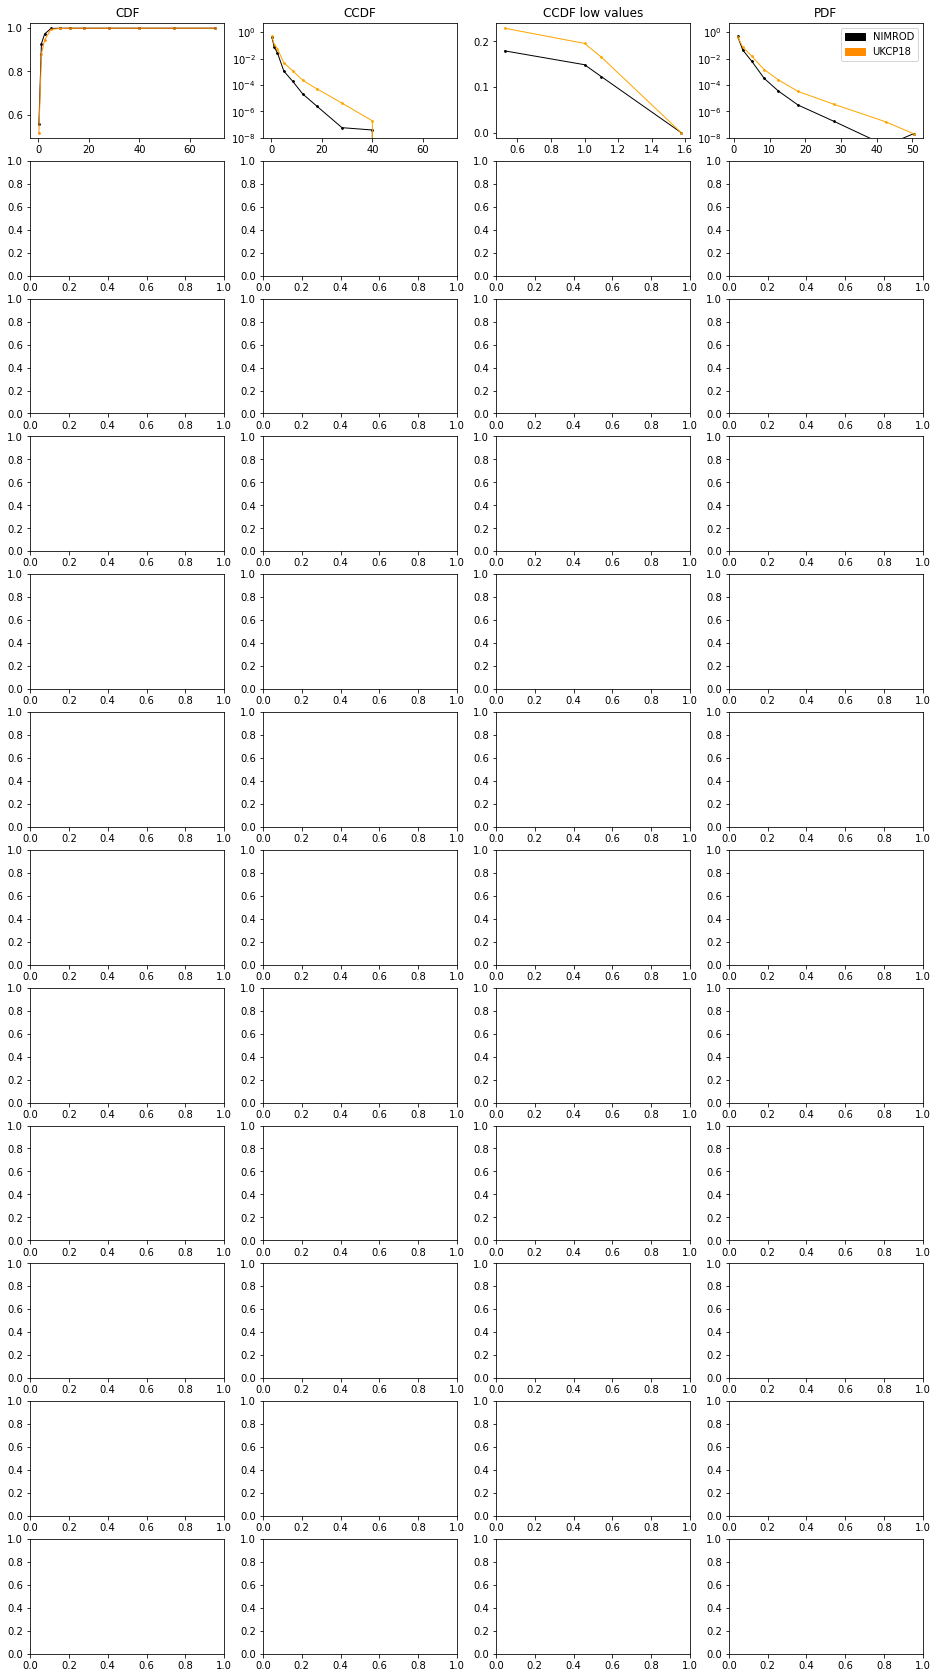

In [72]:
ems = ['01',]

fig, axs = plt.subplots(nrows=12, ncols=4, figsize=(16,30))
for ax_num, em in enumerate(ems):
    model_data_overlap = np.array([])
    model_data_no_overlap = np.array([])
    
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km_regridded_12km/AreaWeighted/1980_2001/{em}/'
    for yr in range(1981,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        this_yr = np.load(file_name)
        model_data_no_overlap =np.append(model_data_no_overlap, this_yr)
        if yr >=1990 and yr <=2001:
            model_data_overlap =np.append(model_data_overlap, this_yr)
    bins_i_want =  [0, 0.5,2, 3, 7, 10,15, 21, 35,45, 62, 78]
    
    obs_overlap_cdf, obs_overlap_ccdf, obs_overlap_bin_centres, obs_overlap_bin_edges = calculate_ccdf_wetvalues(obs_data_overlap, bins_i_want)
    model_overlap_cdf, model_overlap_ccdf, model_overlap_bin_centres, model_overlap_bin_edges = calculate_ccdf_wetvalues(model_data_overlap,bins_i_want)
    
    axs[ax_num, 0].scatter(obs_overlap_bin_centres, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 0].plot(obs_overlap_bin_centres,obs_overlap_cdf ,linewidth = 1, color = 'black')
    axs[ax_num, 0].scatter(model_overlap_bin_centres, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
    axs[ax_num, 0].plot(model_overlap_bin_centres,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
    axs[ax_num, 0].set_title('CDF')

    axs[ax_num, 1].scatter(obs_overlap_bin_centres, obs_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 1].plot(obs_overlap_bin_centres,obs_overlap_ccdf ,linewidth = 1, color = 'black')
    axs[ax_num, 1].scatter(model_overlap_bin_centres, model_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
    axs[ax_num, 1].plot(model_overlap_bin_centres,model_overlap_ccdf ,linewidth = 1, color = 'orange')
    axs[ax_num, 1].set_yscale('log')
    axs[ax_num, 1].set_ylim(1e-8,5)
    axs[ax_num, 1].set_title('CCDF')

    axs[ax_num, 2].scatter(obs_overlap_bin_centres_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 2].plot(obs_overlap_bin_centres_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
    axs[ax_num, 2].scatter(model_overlap_bin_centres_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
    axs[ax_num, 2].plot(model_overlap_bin_centres_low,model_overlap_ccdf_low ,linewidth = 1, color = 'orange')
    axs[ax_num, 2].set_title('CCDF low values')

    axs[ax_num, 3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
    axs[ax_num, 3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'orange')
    axs[ax_num, 3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'orange')
    axs[ax_num, 3].set_title('PDF')
    axs[ax_num, 3].set_yscale('log')
    axs[ax_num, 3].set_ylim(1e-8,5)
    axs[ax_num, 3].legend(handles=patches);
